In [40]:
import pandas as pd

data = pd.read_csv('../datasets/iris.csv')
# using data.copy() to create a new DataFrame, keeping the original data intact
df = pd.DataFrame(data)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,5.0,3.0,1.6,0.2,Iris-setosa
4,5,5.0,3.5,1.3,0.3,Iris-setosa


In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [42]:
df.dropna(inplace=True, axis=0)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,5.0,3.0,1.6,0.2,Iris-setosa
4,5,5.0,3.5,1.3,0.3,Iris-setosa


In [43]:
df_encoded = pd.get_dummies(df, columns=['Species'])
df_encoded.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,1,5.1,3.5,1.4,0.2,True,False,False
1,2,4.9,3.0,1.4,0.2,True,False,False
2,3,4.7,3.2,1.3,0.2,True,False,False
3,4,5.0,3.0,1.6,0.2,True,False,False
4,5,5.0,3.5,1.3,0.3,True,False,False


In [ ]:
# Hierarchial clustering

X = df[['Species']]
feature_names = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

# linkage used to calculate the distance between clusters
linkage_matrix = linkage(X, method='ward')

# Fit Agglomerative clustering model
n_clusters = 3
model = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
cluster_labels = model.fit_predict(X)

#Adding cluster column
iris1 = pd.DataFrame(data=np.column_stack((X, cluster_labels)), columns=['species', 'Cluster'])
ccardNew = pd.merge(df, iris1, how='inner')
df['Cluster'] = cluster_labels

ValueError: could not convert string to float: 'Iris-setosa'

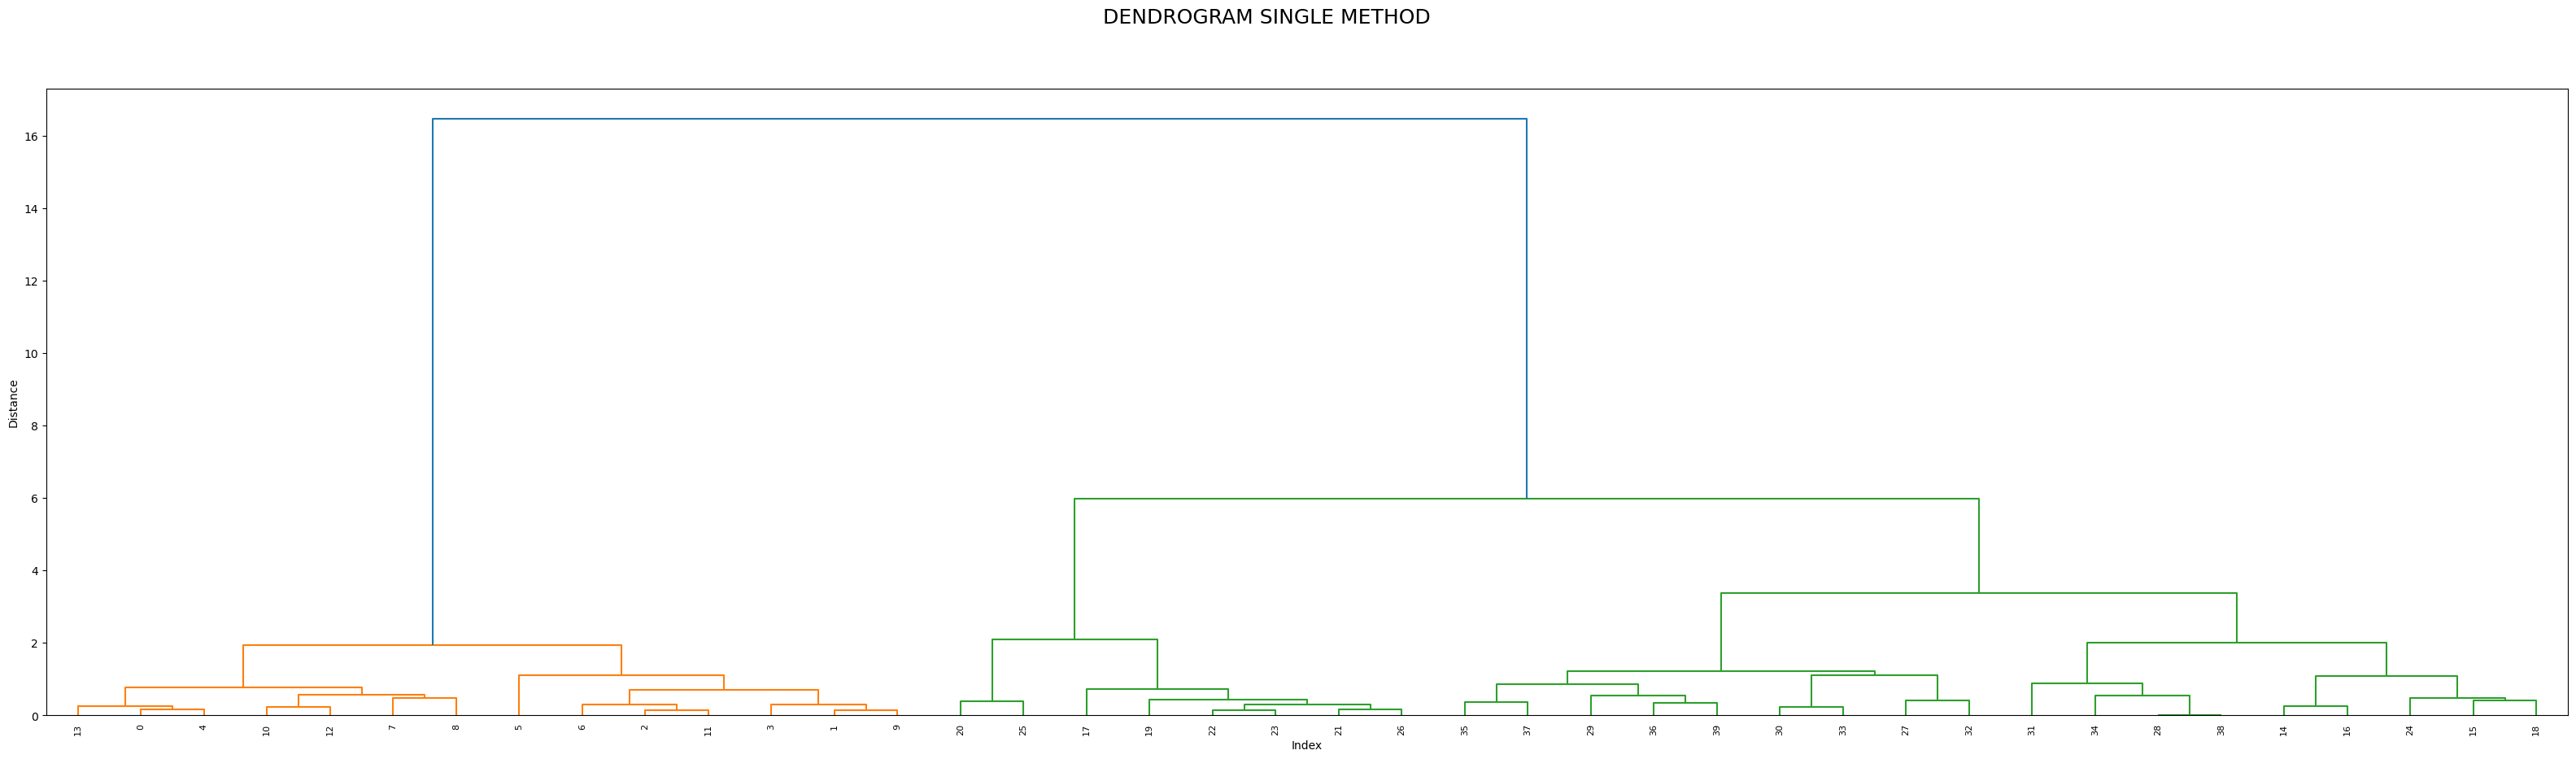

In [44]:
dist_sin = linkage(feature_names,method="ward")
plt.figure(figsize=(40,10))
dendrogram(dist_sin, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM SINGLE METHOD",fontsize=18)
plt.show()

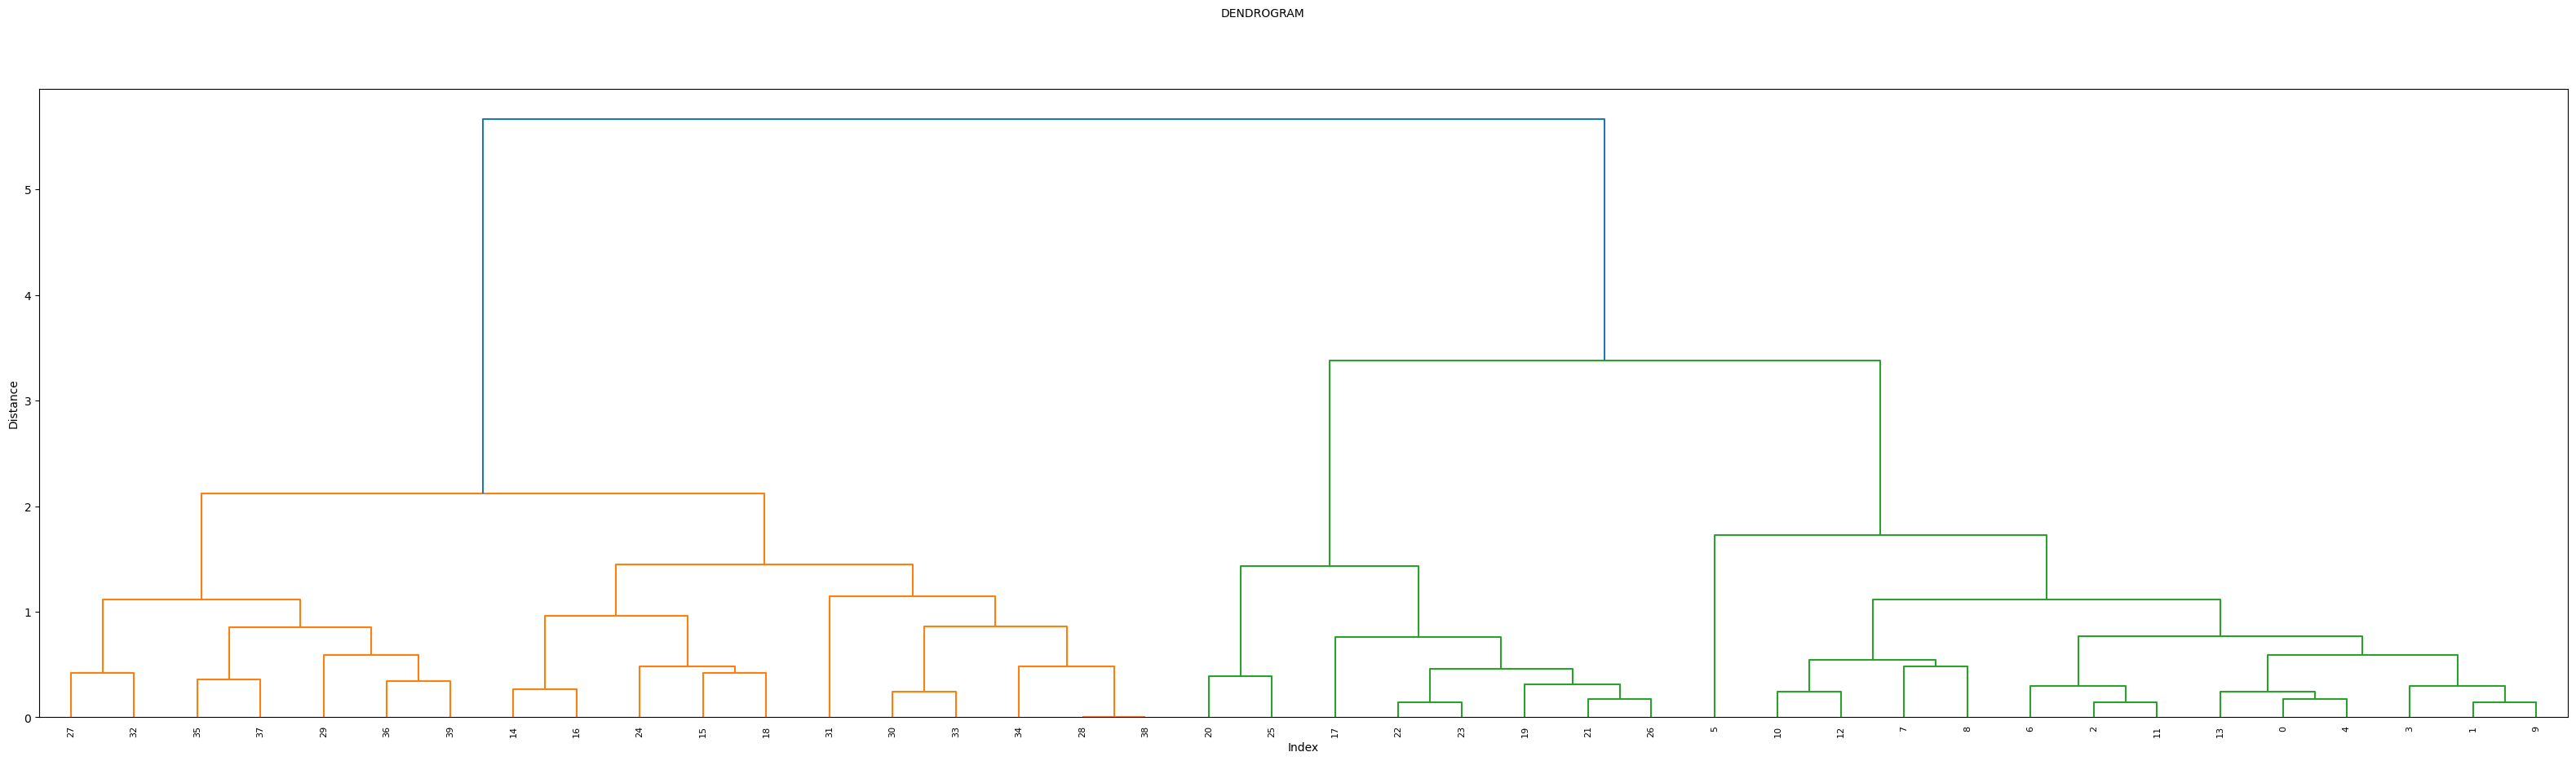

In [45]:
dist_comp = linkage(feature_names,method="complete")

plt.figure(figsize=(40,10))
dendrogram(dist_comp, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM",fontsize=10)
plt.show()

In [46]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,5.0,3.0,1.6,0.2,Iris-setosa
4,5,5.0,3.5,1.3,0.3,Iris-setosa


NameError: name 'ccardNew' is not defined

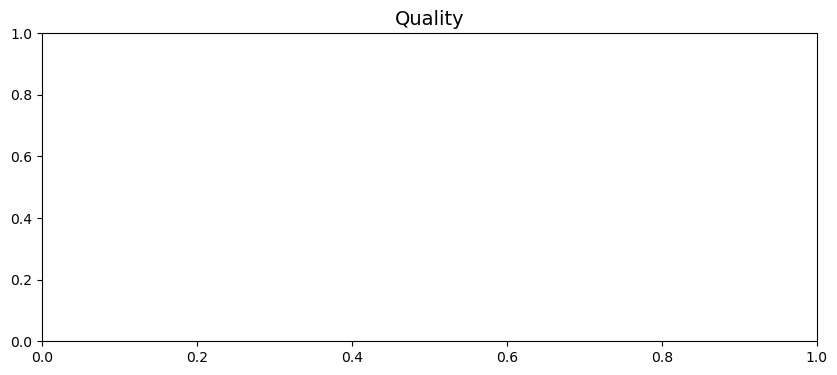

In [48]:
import seaborn as sns
plt.figure(figsize=(10,4))

plt.title("Quality",fontsize=14)
sns.scatterplot(x="density",y="alcohol", data=ccardNew, hue="quality")

NameError: name 'ccardNew' is not defined

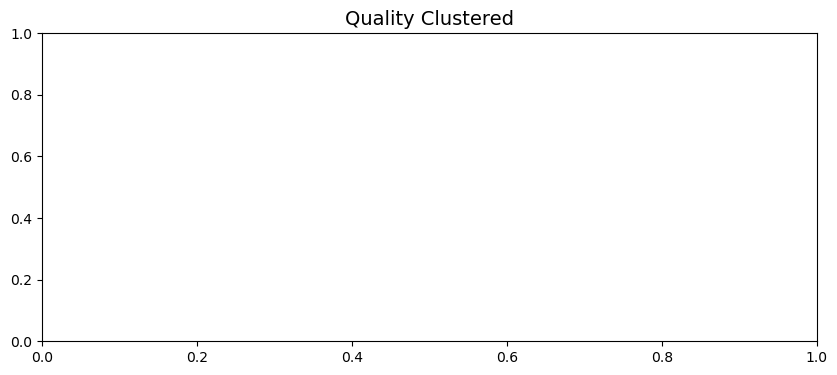

In [ ]:
plt.figure(figsize=(10,4))
plt.title("Quality Clustered",fontsize=14)
sns.scatterplot(x="density",y="alcohol", data=ccardNew, hue="Cluster")

In [51]:
# K-means clustering sci-kit learn

df_new = ccard[['fixed acidity',	'density','alcohol','quality']].copy()

KeyError: "None of [Index(['fixed acidity', 'density', 'alcohol', 'quality'], dtype='object')] are in the [columns]"

In [52]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

ValueError: could not convert string to float: 'Iris-setosa'

In [54]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(new_ccard)
    distortions.append(kmeanModel.inertia_)

NameError: name 'new_ccard' is not defined

ValueError: x and y must have same first dimension, but have shapes (9,) and (0,)

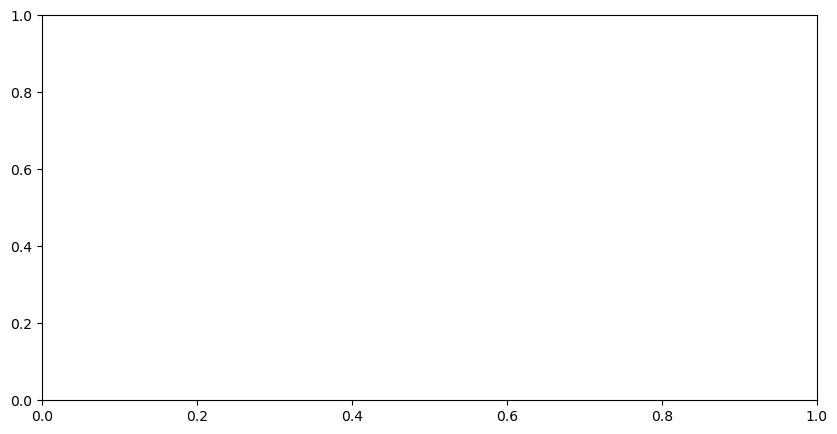

In [56]:
plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [57]:
kmeanModel = KMeans(n_clusters=2)
kmeanModel.fit(new_ccard)

NameError: name 'new_ccard' is not defined

In [59]:
new_ccard['k_means']=kmeanModel.predict(new_ccard)
new_ccard['target']=ccard['quality']


fig, axes = plt.subplots(1, 2, figsize=(20,8))
axes[0].scatter(new_ccard['density'], new_ccard['alcohol'], c=new_ccard['quality'])
axes[1].scatter(new_ccard['density'], new_ccard['alcohol'], c=new_ccard['k_means'], cmap=plt.cm.Set1)
axes[0].set_title('Actual', fontsize=10)
axes[1].set_title('K_Means', fontsize=10)

NameError: name 'new_ccard' is not defined

In [61]:
# Silhoutte Score
import sklearn.metrics
from sklearn.metrics import silhouette_score
score = silhouette_score(new_ccard, kmeanModel.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score)

NameError: name 'new_ccard' is not defined

In [62]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Sample transaction data (replace this with your dataset)
transactions = [
    ['bread', 'milk', 'eggs'],
    ['bread', 'butter'],
    ['milk', 'butter'],
    ['bread', 'milk', 'butter'],
    ['bread', 'milk'],
]

# Convert the transaction data to a one-hot encoded format
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.3)

# Display the results
#print("Frequent Itemsets:")
frequent_itemsets

#print("\nAssociation Rules:")

ModuleNotFoundError: No module named 'mlxtend'

In [63]:
rules

NameError: name 'rules' is not defined